In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [73]:
delitos = pd.read_csv('../../data/clean/DelitosTipo1/DelitosTipo1-2010-2020_deltas_mensuales(interpolado).csv')
desempleo = pd.read_csv('../../data/clean/Tasa de Desempleos/tasa_de_desempleos_y_mas_limpio.csv')

In [74]:
# Delete unnecesary column
del delitos["Unnamed: 0"]

# Rename column so it has the same name on both dfs
delitos.rename(columns = {'Distrito':'Municipio'}, inplace = True)

# # Hay que tener el mismo range de datos en ambos dfs, desde 2010 hasta 2020
delitos.drop(delitos[(delitos['Date'] > '2020-09')].index, inplace=True)

delitos

,Municipio,Tipo I,Ases.,Viol.,Robo,Agr. Grave,Esc.,Apr. I,H. Auto,Date
0,Adjuntas,34.0,0.0,0.0,4.0,1.0,12.0,16.0,1.0,2010-01-01
1,Ponce,243.0,4.0,0.0,26.0,14.0,52.0,123.0,24.0,2010-01-01
2,Peñuelas,12.0,0.0,0.0,2.0,0.0,6.0,2.0,2.0,2010-01-01
3,Patillas,13.0,0.0,0.0,0.0,4.0,6.0,3.0,0.0,2010-01-01
4,Orocovis,22.0,0.0,0.0,0.0,0.0,10.0,12.0,0.0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...
9979,Orocovis,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2020-08-01
9980,Patillas,8.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,2020-08-01
9981,Peñuelas,6.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2020-08-01
9982,Ponce,54.0,1.0,1.0,3.0,16.0,3.0,29.0,1.0,2020-08-01


In [75]:
# Cambiar el nombre de la columna de los municipios
desempleo.rename(columns = {'Municipio o Area':'Municipio'}, inplace = True)
desempleo

,Date,Municipio,Tasa de Desempleo,Num. Personas Desempleadas,Num. Personas Empleadas,Num. Personas Grupo Trabajador
0,2000-08-01,"San Juan-Carolina-Caguas, PR",9.1,83476.0,782071.0,839751.0
1,2000-08-01,Vieques,10.8,332.0,2562.0,2336.0
2,2000-08-01,"San Germán, PR",11.6,6004.0,41363.0,45568.0
3,2000-08-01,Carolina,8.1,6800.0,71512.0,75943.0
4,2000-08-01,Vega Baja,10.8,2377.0,17830.0,19616.0
...,...,...,...,...,...,...
22700,2020-08-01,Manatí NSA,8.5,932.0,10056.0,10988.0
22701,2020-08-01,Luquillo,10.4,622.0,5343.0,5965.0
22702,2020-08-01,Culebra,8.0,75.0,858.0,933.0
22703,2020-08-01,Morovis,11.0,847.0,6856.0,7703.0


* Nota:
Tras analizar la data, nos dimos cuenta de que hay municipios que se repiten. Por ejemplo, para Mayagüez en enero-2010, hay una taza de desempleo de 16.9. Sin embargo, hay otro valor que se llama "Mayagüez, PR" que tiene otra taza de desempleo diferente de 17.6. Lo que trato de decir es que el mismo municipio está escrito con el mismo nombre y con valores distintos. Por eso se tomo la desición de eliminar aquellos que contenian el (", PR") en su nombre.

In [76]:
# Crear un df que haga match del municipio y el date con el resto de las columnas
df = pd.merge(desempleo, delitos, on=['Date', 'Municipio'])
# df["Municipio"].unique()
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.dtypes

Date                              datetime64[ns]
Municipio                                 object
Tasa de Desempleo                        float64
Num. Personas Desempleadas               float64
Num. Personas Empleadas                  float64
Num. Personas Grupo Trabajador           float64
Tipo I                                   float64
Ases.                                    float64
Viol.                                    float64
Robo                                     float64
Agr. Grave                               float64
Esc.                                     float64
Apr. I                                   float64
H. Auto                                  float64
dtype: object

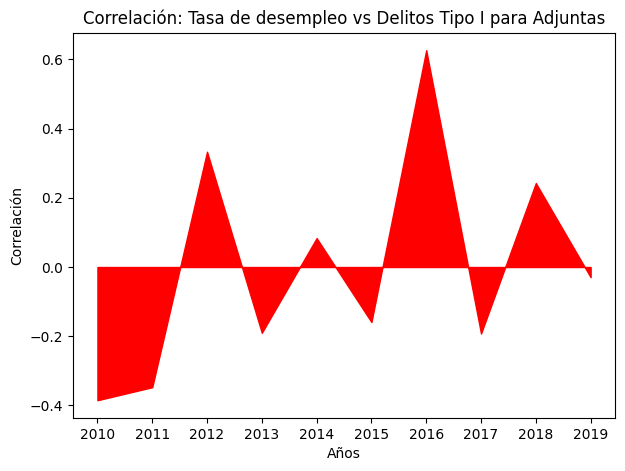

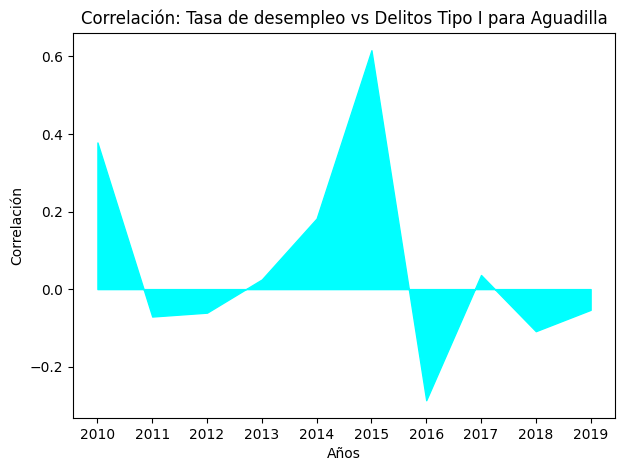

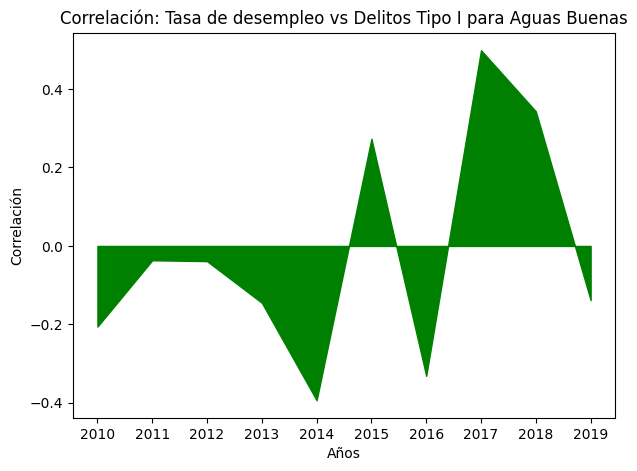

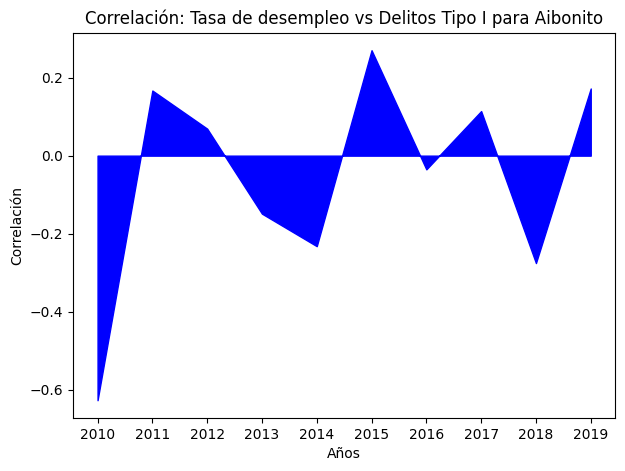

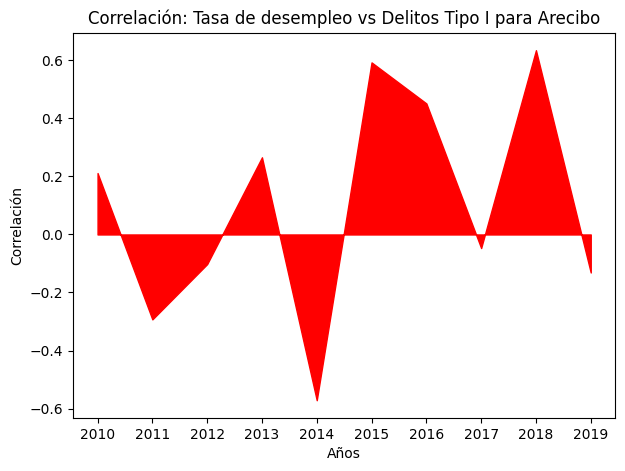

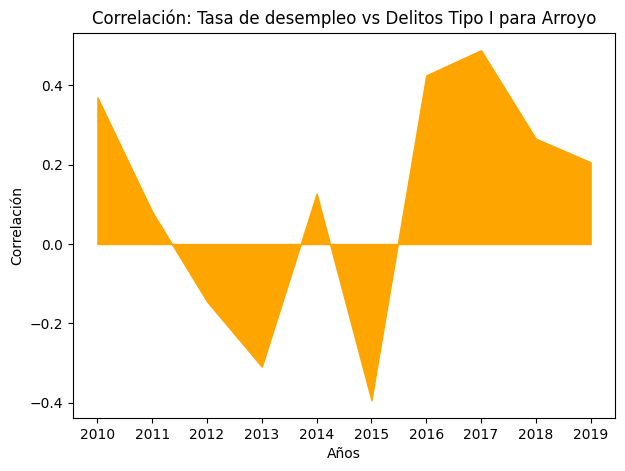

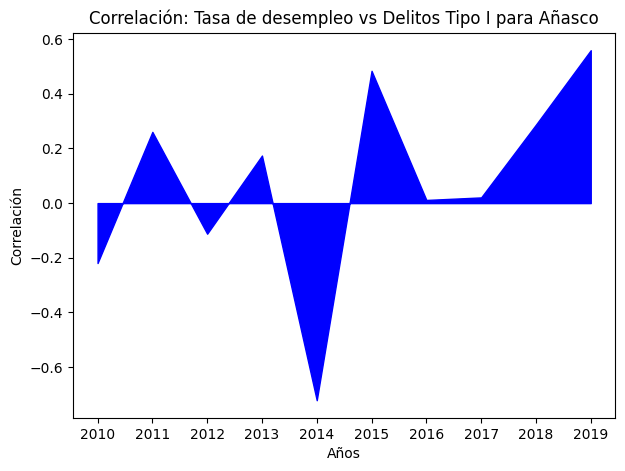

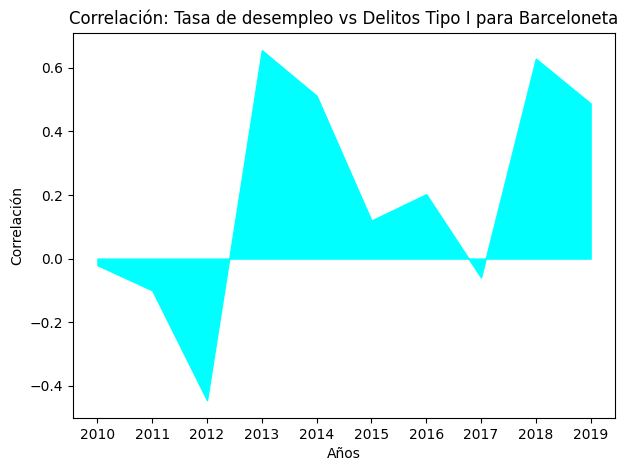

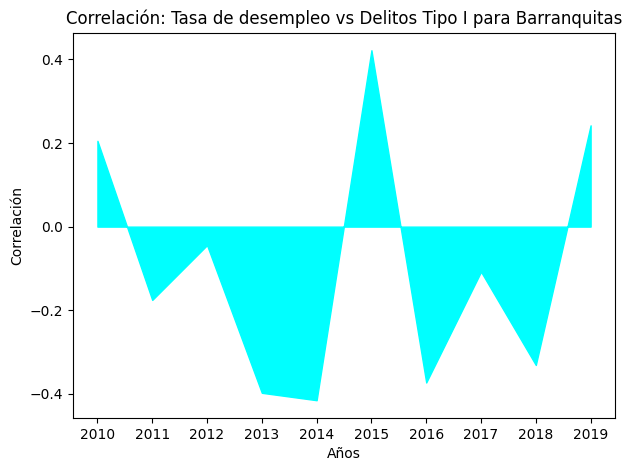

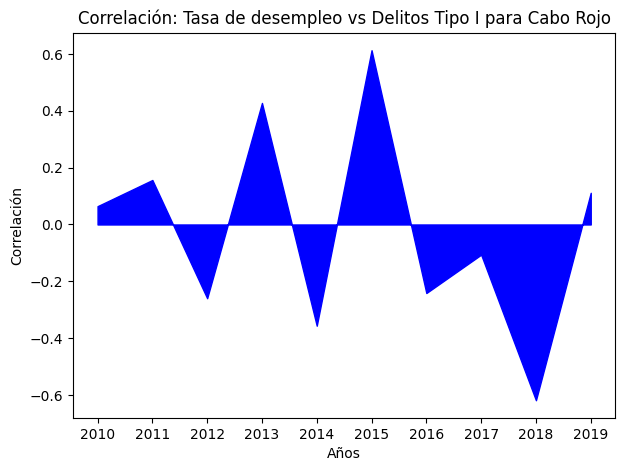

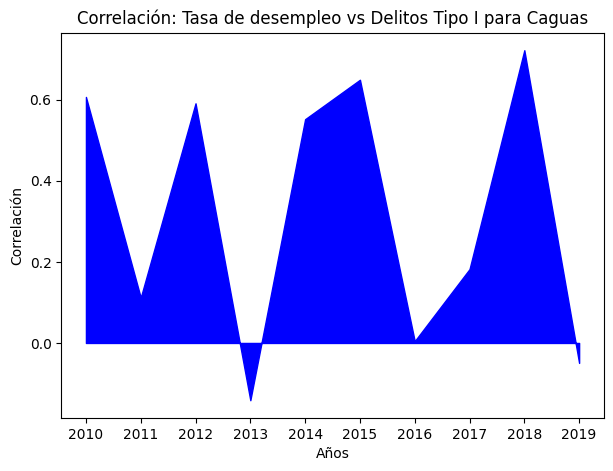

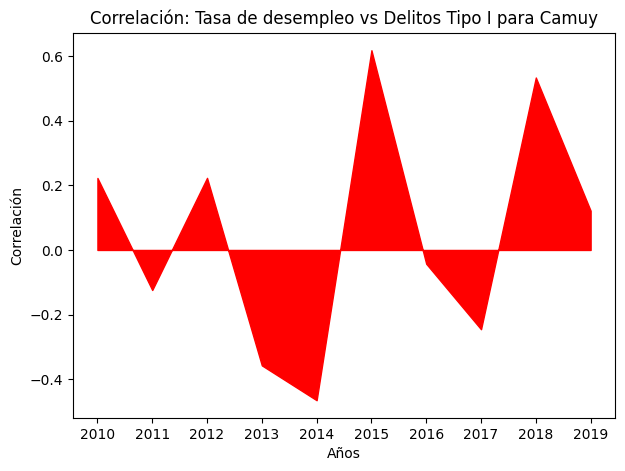

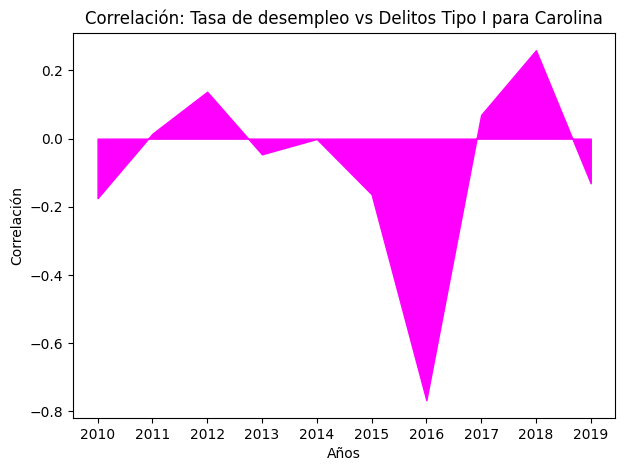

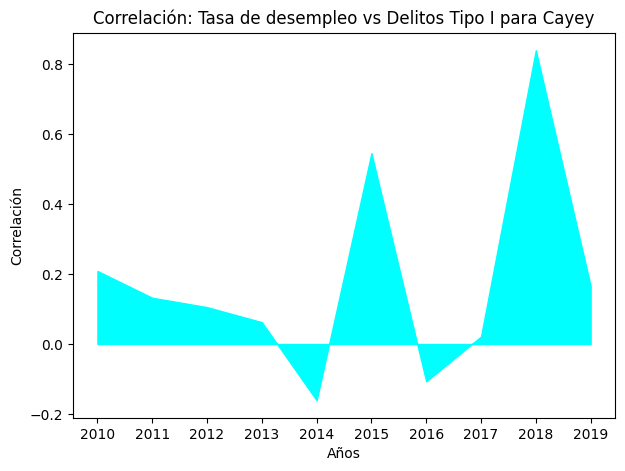

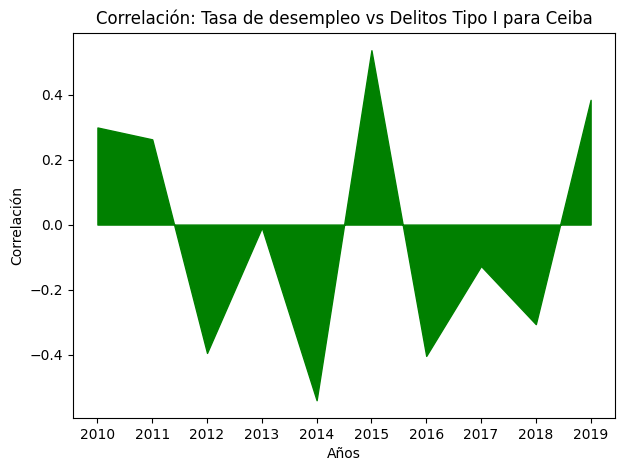

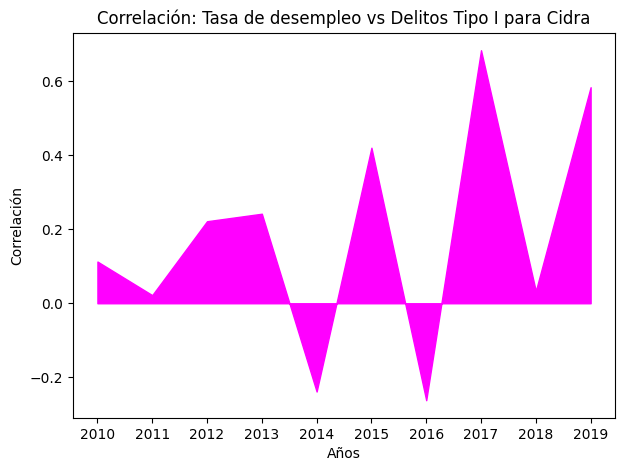

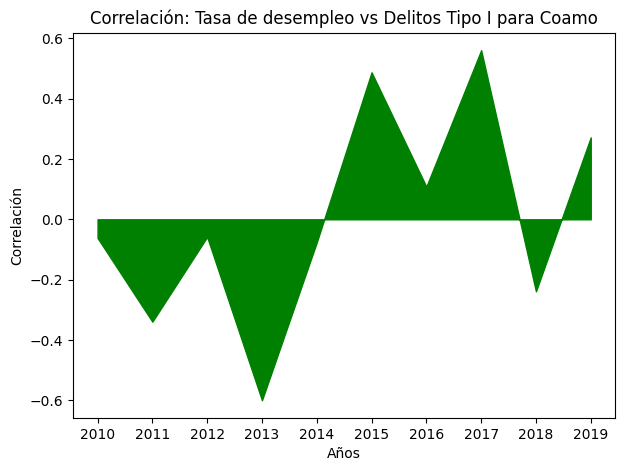

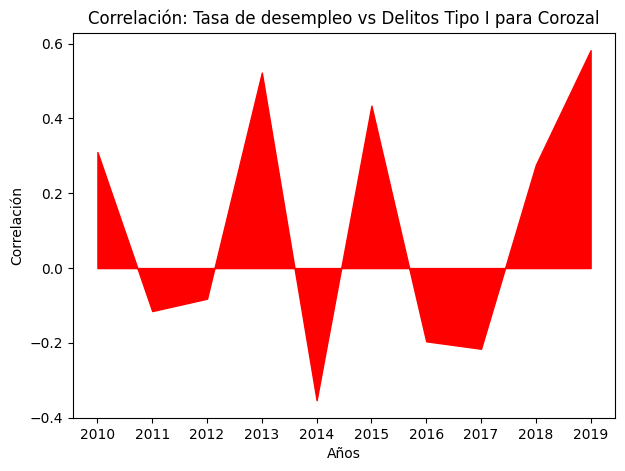

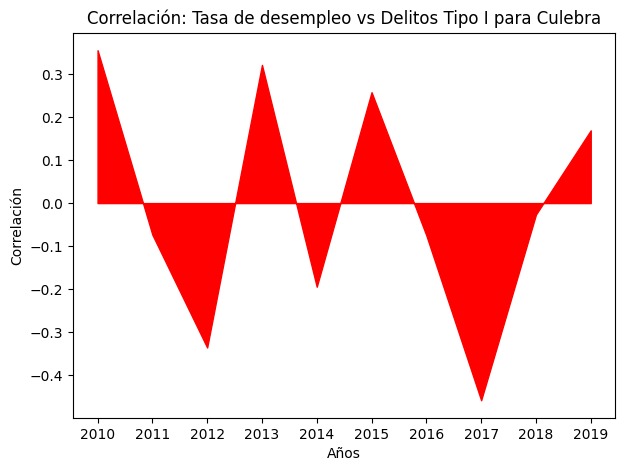

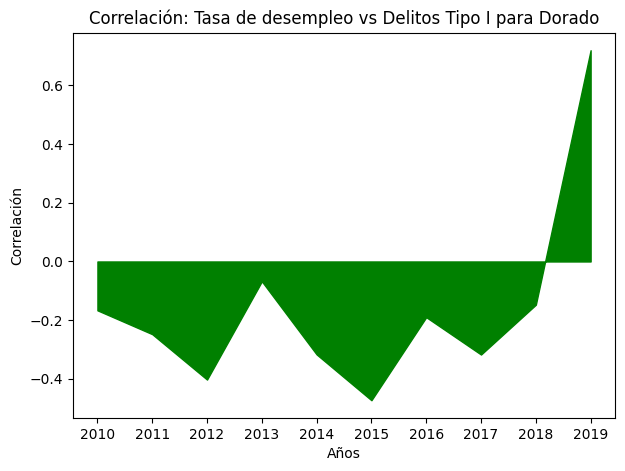

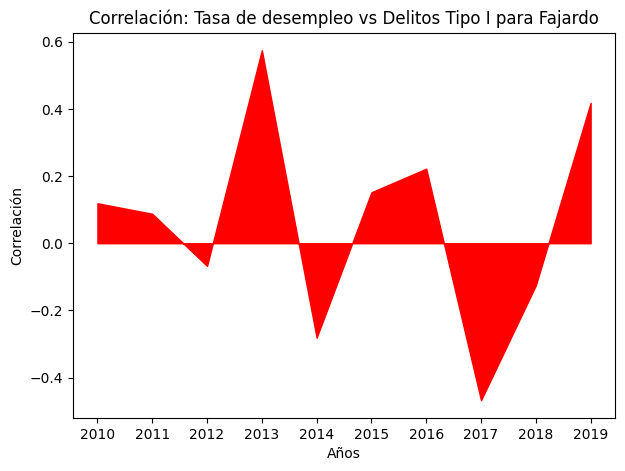

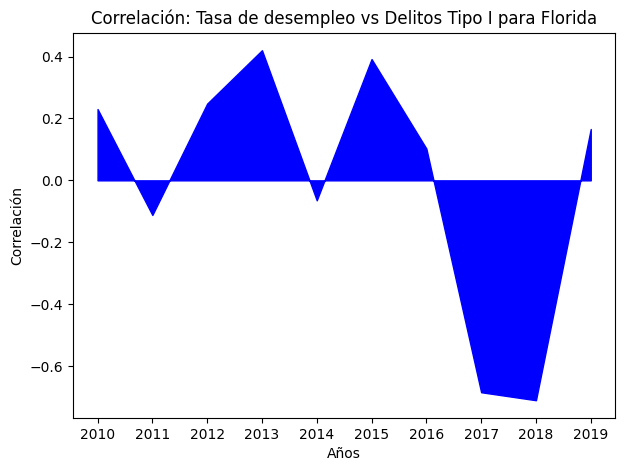

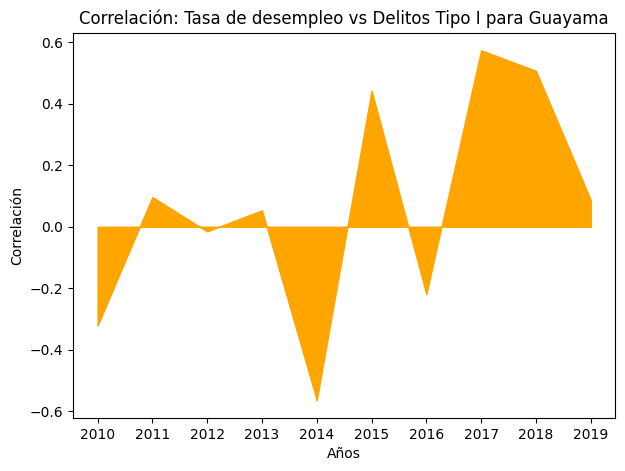

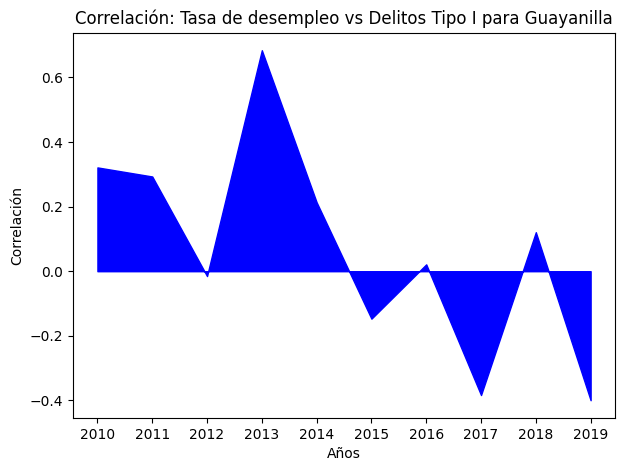

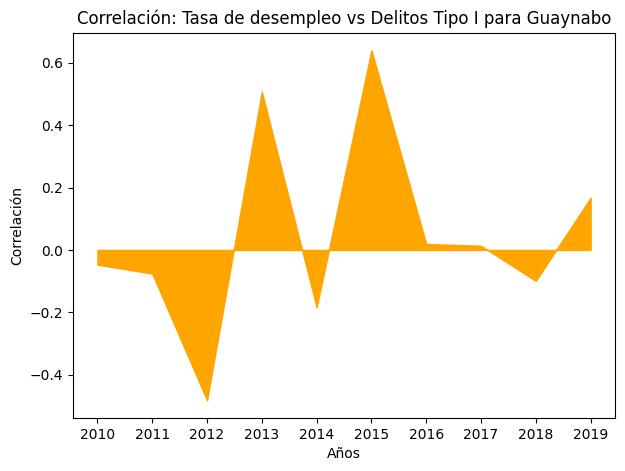

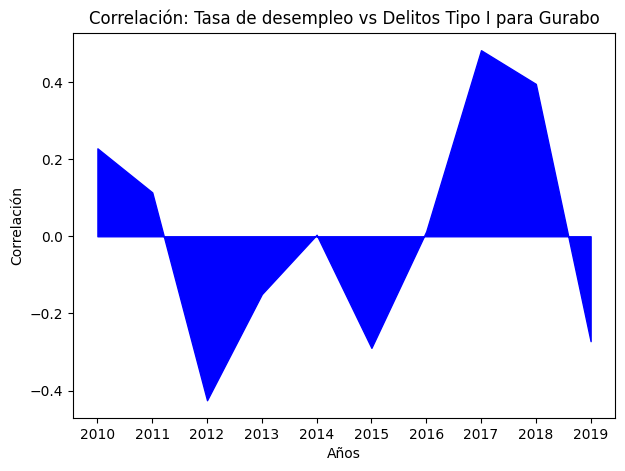

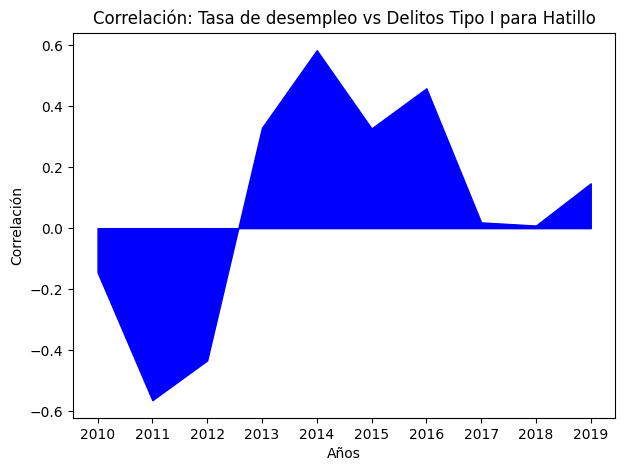

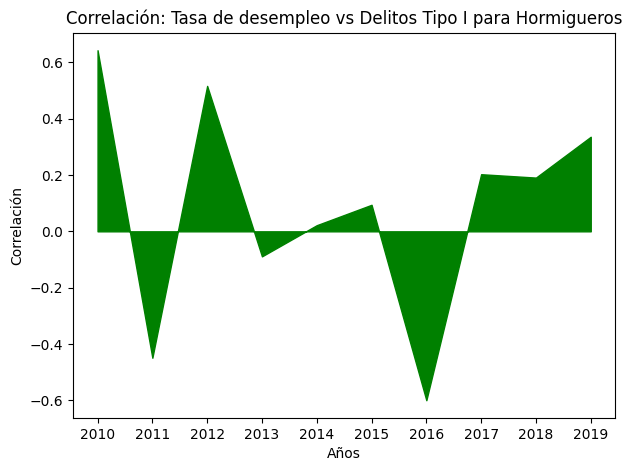

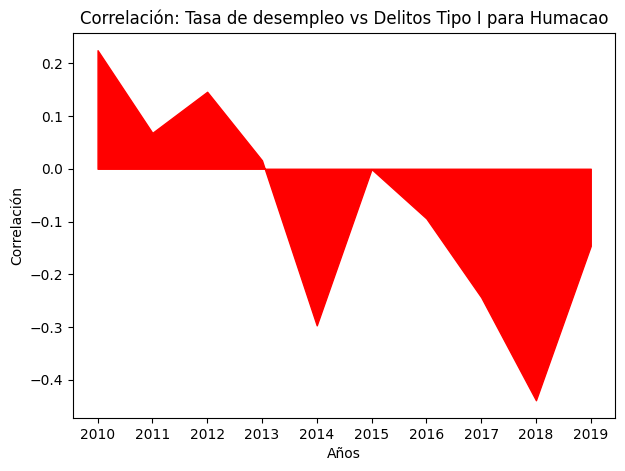

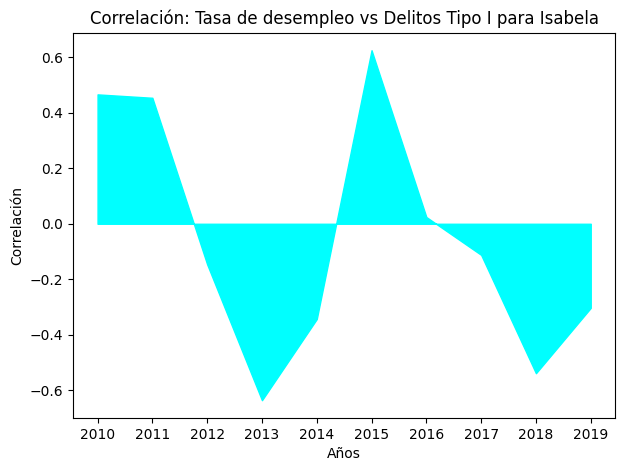

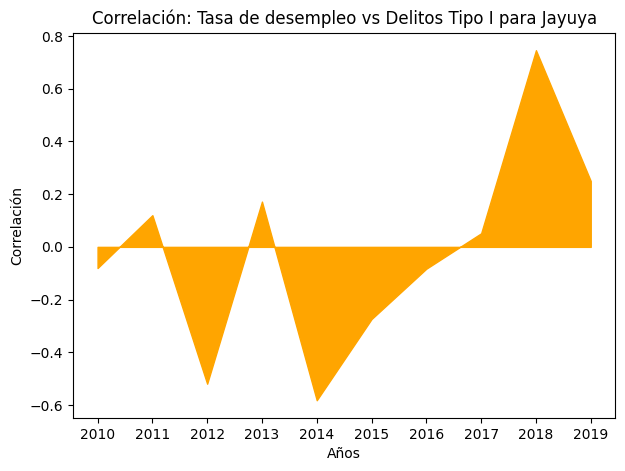

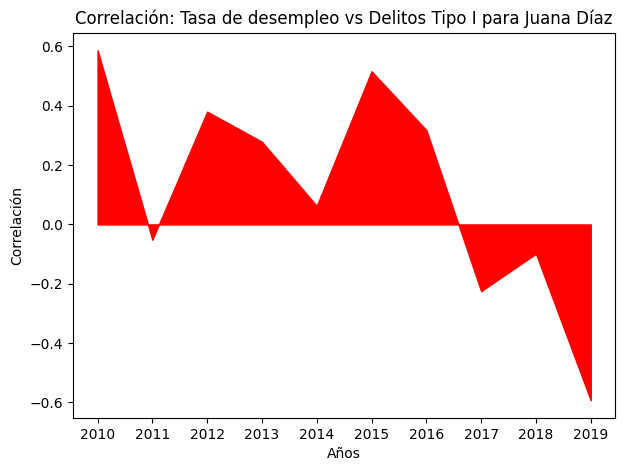

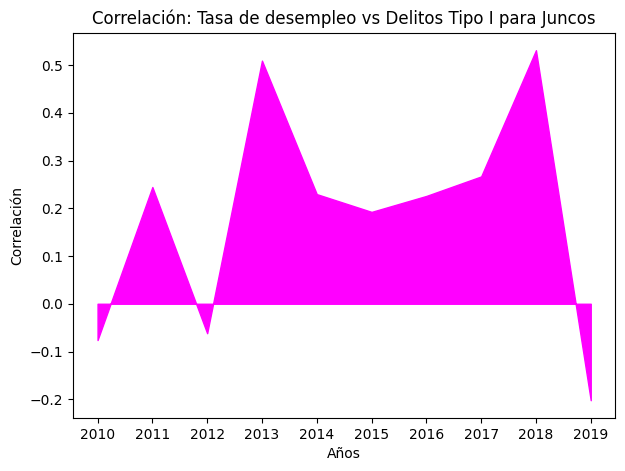

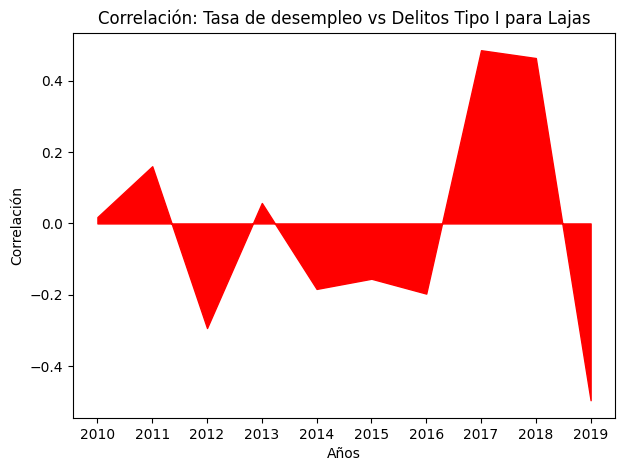

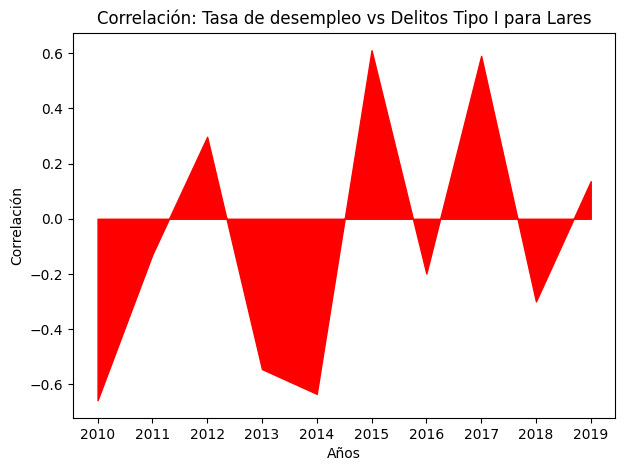

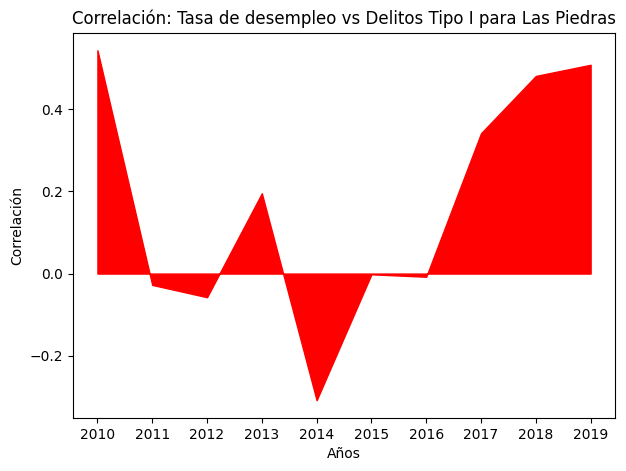

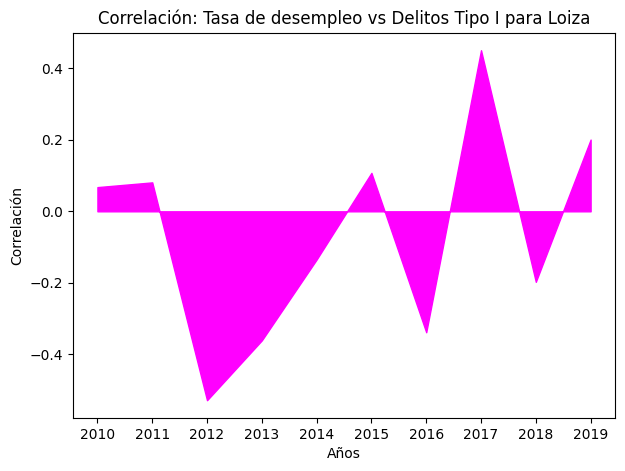

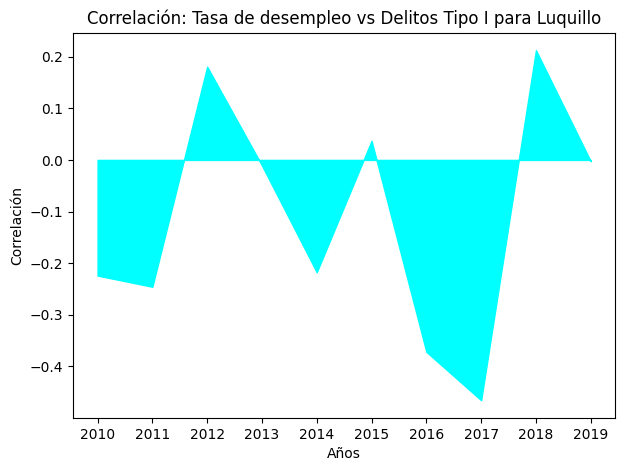

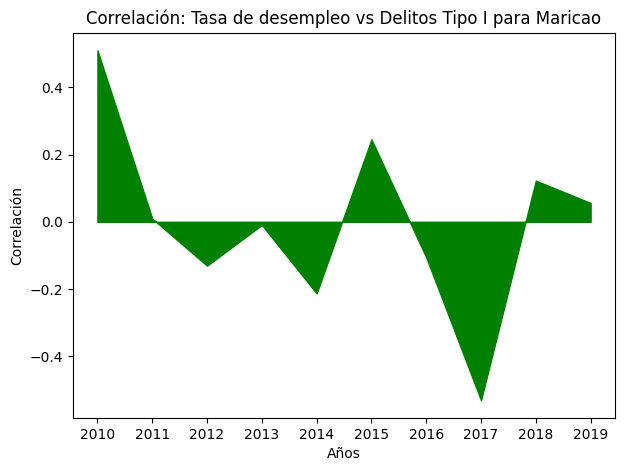

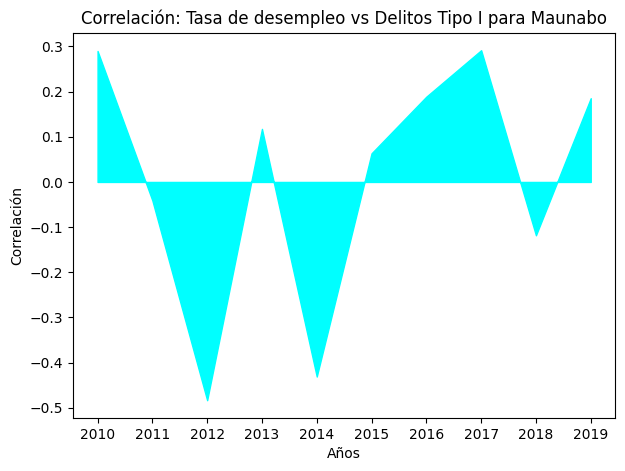

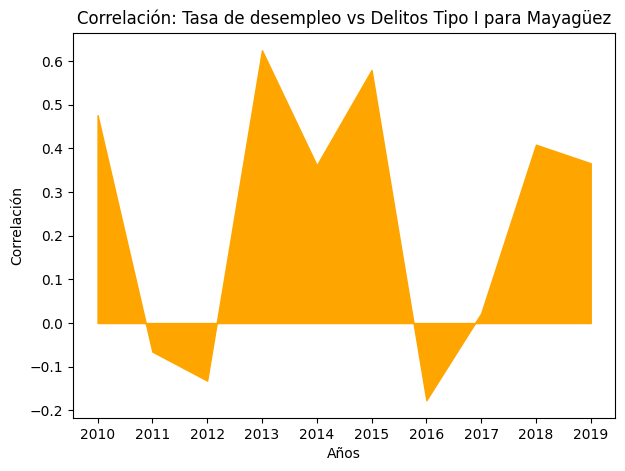

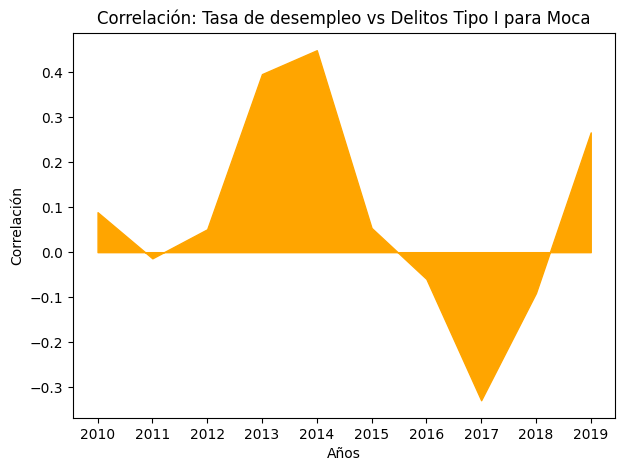

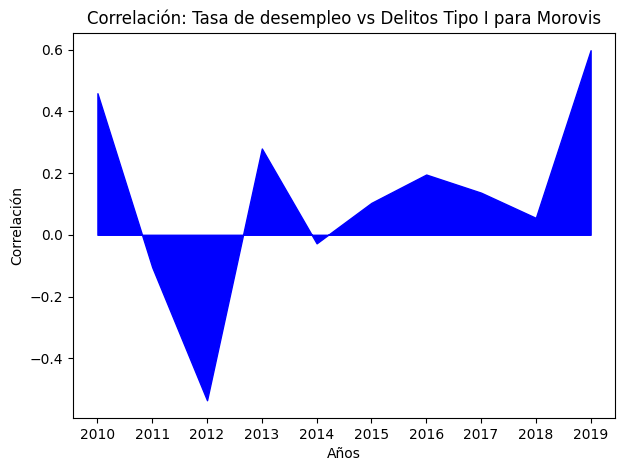

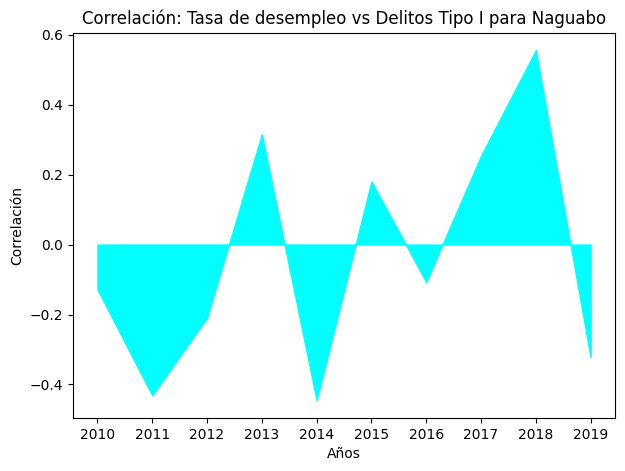

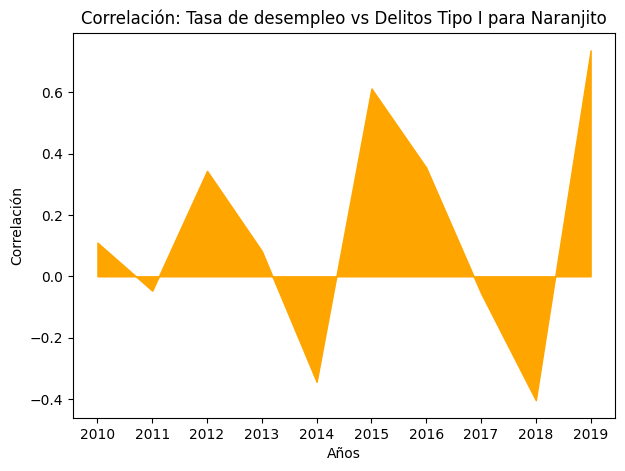

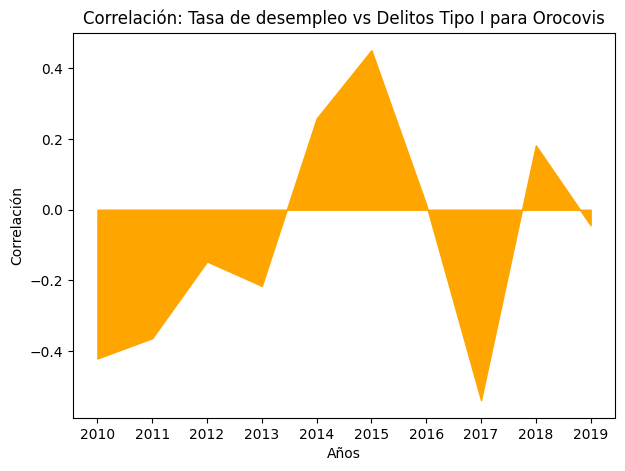

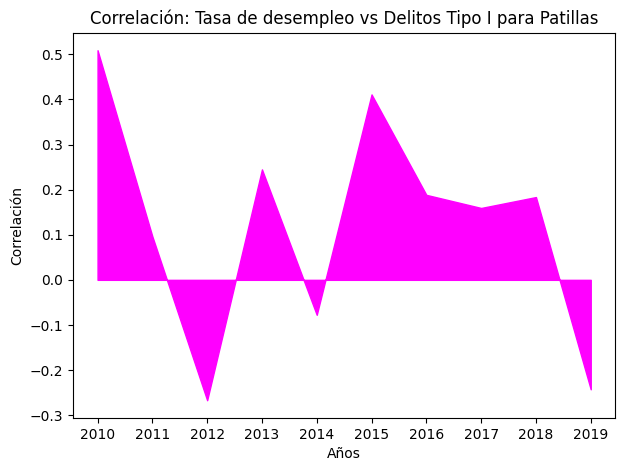

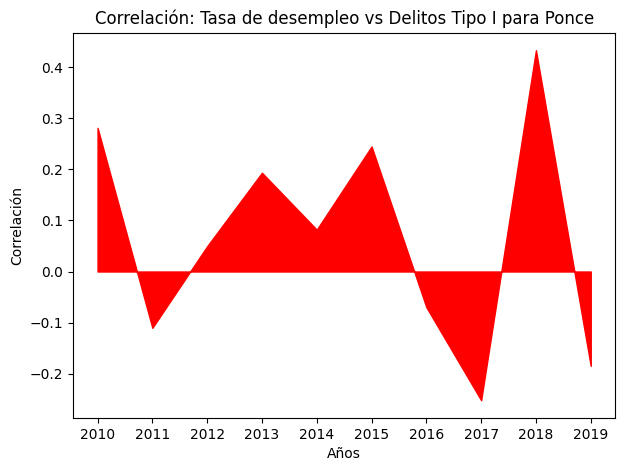

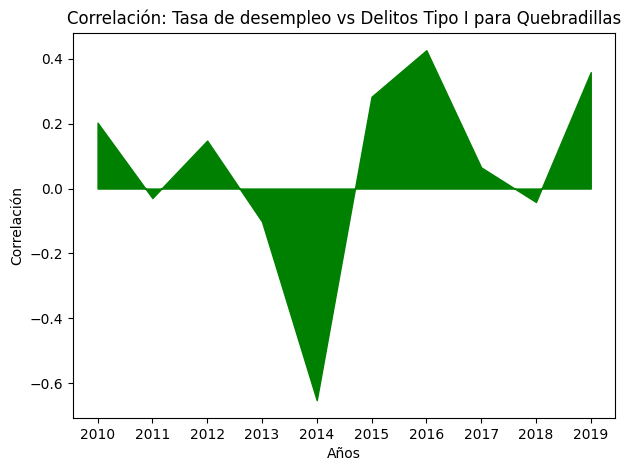

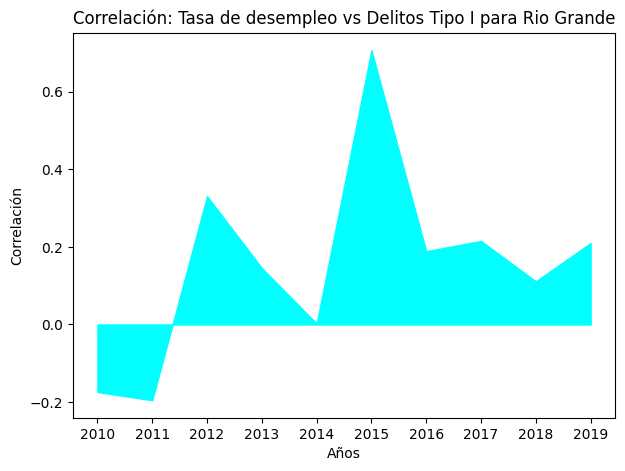

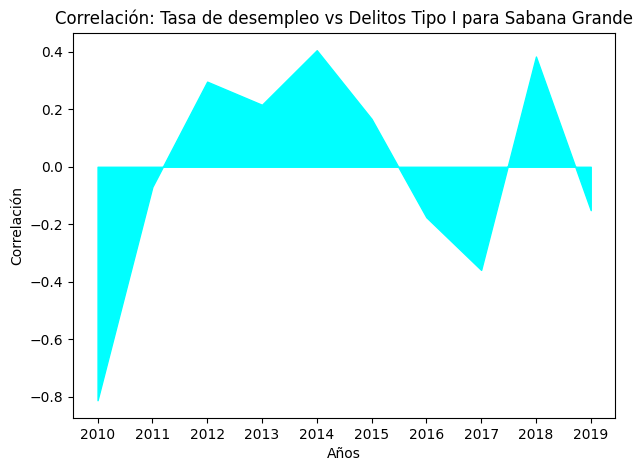

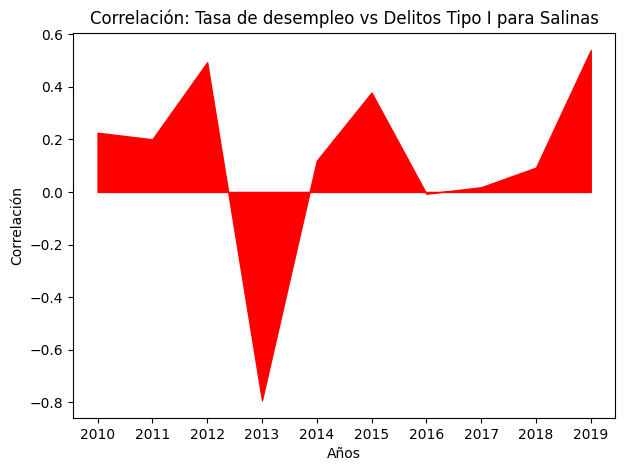

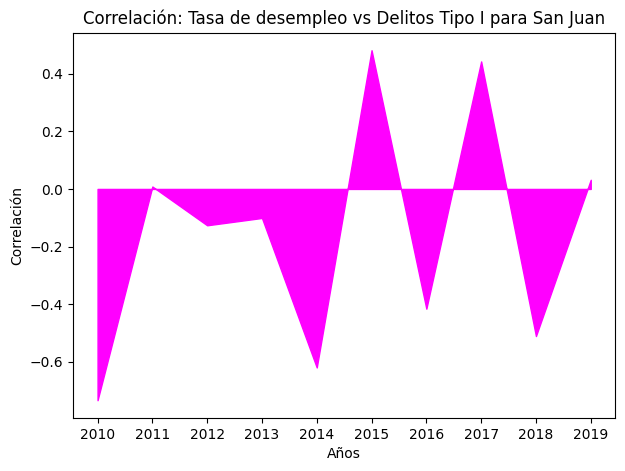

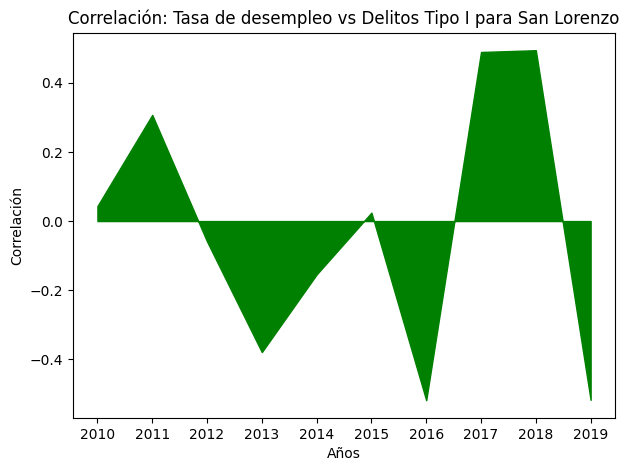

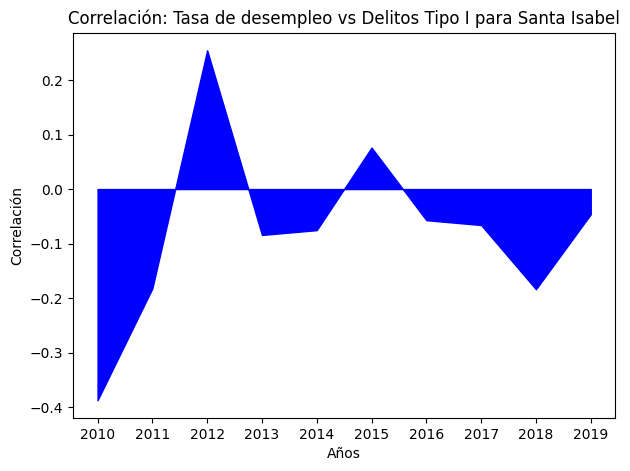

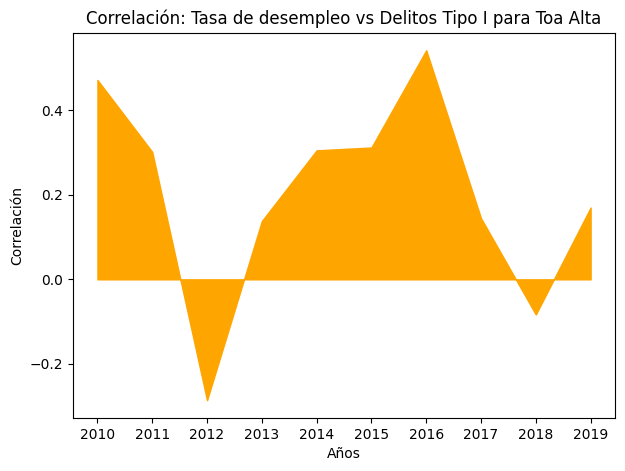

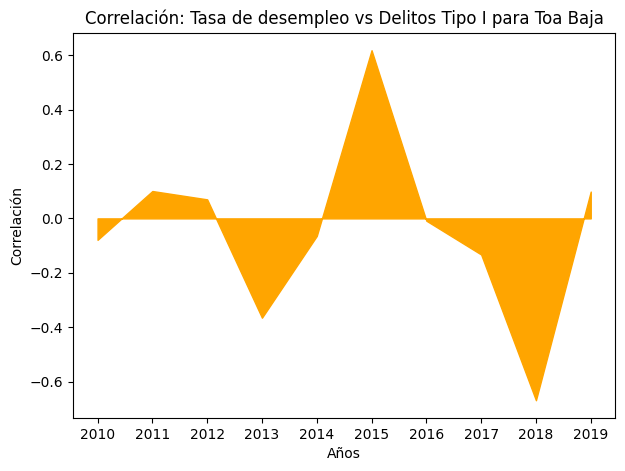

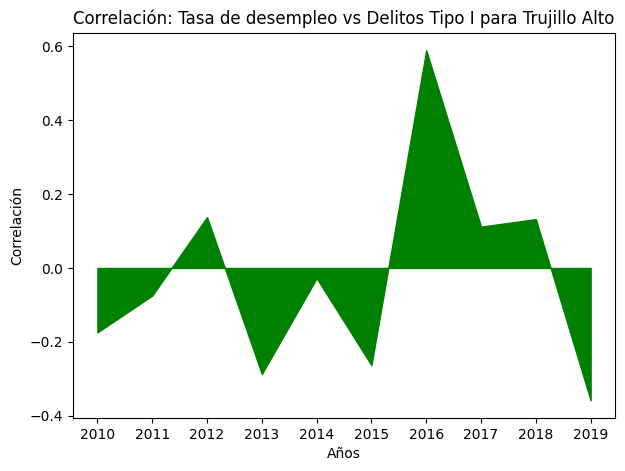

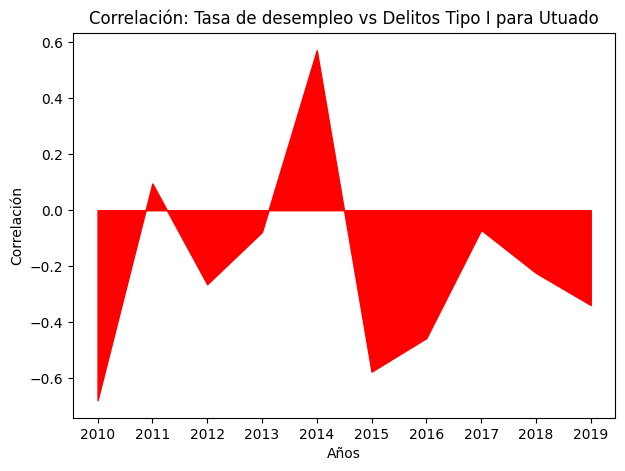

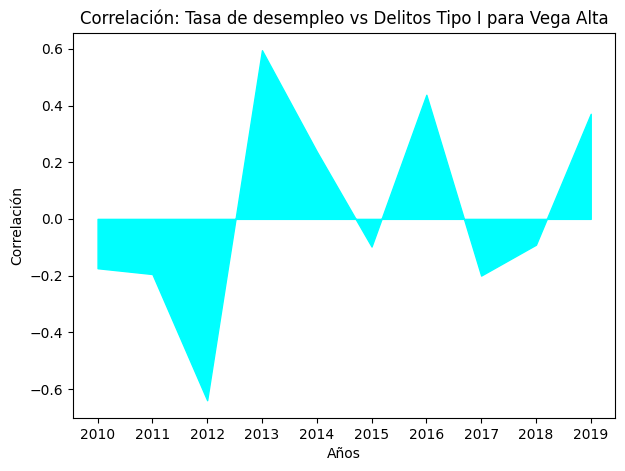

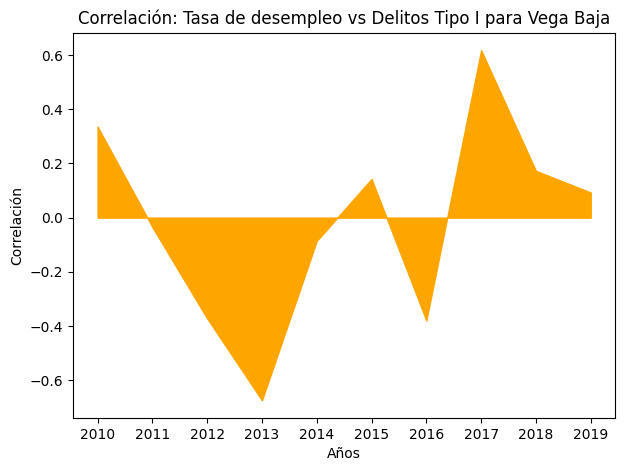

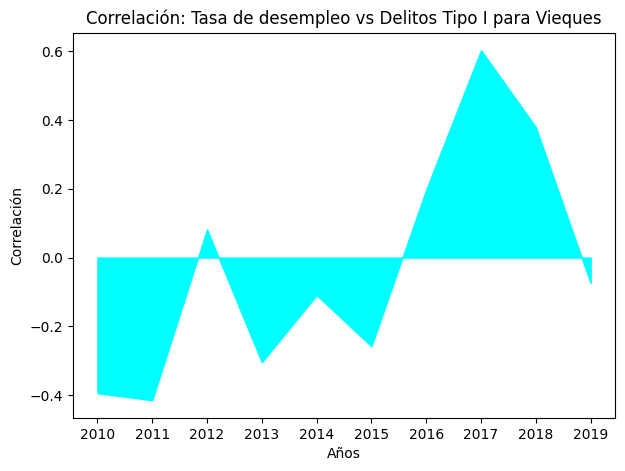

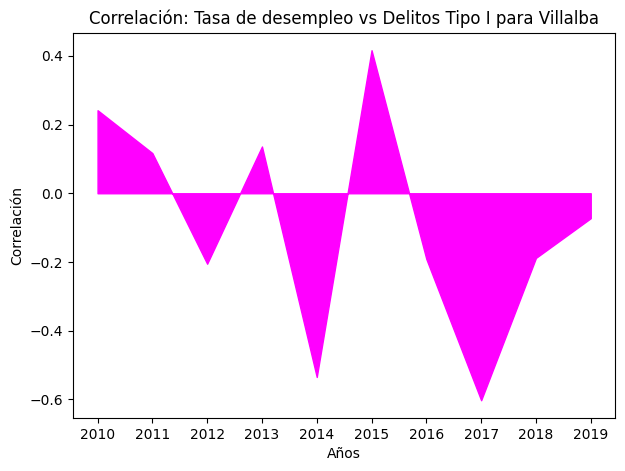

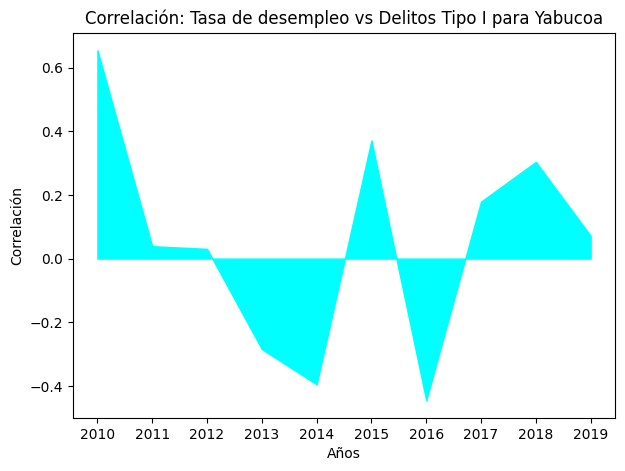

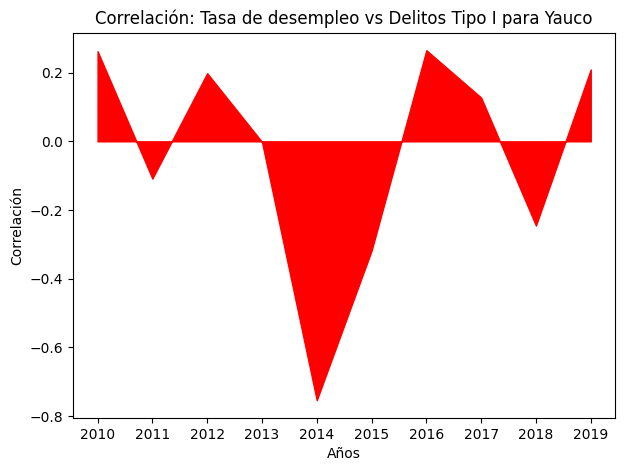

In [79]:
# Tengo que crear un for loop para sacar la correlacion entre delitos y desempleo por municipio anualmente desde el 2010 hasta el 2022
municipios = list(df['Municipio'].unique())
municipios.sort()
# municipios 

years = range(2010, 2020)

colors = ['red', 'green', 'blue', 'orange', 'cyan', 'magenta', 'yellow']

# Por cada municipio quiero una gráfica
for municipio in municipios:

    # Crea un df con el municipio 
    pueblo = df.loc[df['Municipio'] == municipio]

    correlaciones = []
    # Crea una correlación entre los tipo 1 y desempleo para esos muncipcios
    for year in years:
        time_slot = pueblo.loc[pueblo['Date'].dt.year == year]
        correlacion = time_slot[['Tipo I', 'Tasa de Desempleo']].corr().iloc[0::2, -1].reset_index()
        correlaciones.append(correlacion['Tasa de Desempleo'][0])

    # Bar chart
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    ax.stackplot(years,correlaciones, color=colors[np.random.randint(0,6)])

    ax.set_title(f'Correlación: Tasa de desempleo vs Delitos Tipo I para {municipio}')
    ax.set_xlabel('Años')
    ax.set_ylabel('Correlación')

    ax.set_xticks(years)
    plt.show()